4.ダーツ投げのシミュレーションの作成
実装する上での前提条件を以下に示します。

複数のダーツのまとは、間を空けずに横一列に並んでいるとします。
ある番号のまとに狙ったダーツは、他のまとには行かないとします。
実装するフローは以下になります。

ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）
サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）
ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）
1~3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。）
各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。）

【問題1】ダーツのまとを選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。

《ヒント》

「サイコロを振る」動作を表現するのにnp.random.choice()を用います。こうすることで配列の中からランダムに要素を1つ選ぶことができます。

In [162]:
import numpy as np

n_target = 6

def dice(n_target):
    target = np.random.choice(np.arange(1,n_target+1))
    return target

print(dice(n_target))

6


【問題2】ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 刺さった場所（座標）は、配列で保持するようにしてください。

《ヒント》

ダーツが刺さった場所（座標）は、二次元正規分布を真上から見たときのx座標、y座標の交点として表現しましょう。x座標、y座標の各値は、それぞれが独立した一次元正規分布に従うものとし、x座標とy座標用に、別々にnp.random.normal()から変数を発生させ、それらの組みを座標点として、配列で保持してください。

また、二次元正規分布はnp.random.multivariate_normal()を用いて表現することもできます。その場合、例えば平均値ベクトルを[0,0] (mean=[0,0])、共分散行列を[[[0.01,0],[0,0.01]] (cov=[[0.01,0],[0,0.01]])としてnp.random.multivariate_normal(mean, cov)とすると、x座標とy座標の変数の組みを作れます。

In [163]:
mean = [0, 0]
cov = [[0.01, 0],[0, 0.01]]

def random_choice(mean, cov):
    random_norm = np.random.multivariate_normal(mean, cov, size = 1)
    return random_norm

random_norm = random_choice(mean, cov)
print(random_norm[0])

[ 0.12673972 -0.1003375 ]


【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。

《ヒント》

「ダーツを1000回投げる」というのは 問題1のサイコロを1000回振る　ことに相当します。 問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。

In [143]:
#ディクショナリのフォーマット作成
def darts(mean, cov, n_iter=None):
    
    darts_dict = {}
    for i in range(n_iter):
        target = dice()
        target_posi = random_choice(mean, cov)
        if target in darts_dict.keys():
            darts_dict[target]= np.concatenate([darts_dict[target], target_posi])
        else:
            darts_dict[target] = target_posi

    return darts_dict


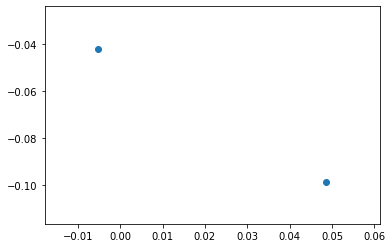

In [148]:
import matplotlib.pyplot as plt
all_target_posi = darts(mean, cov, n_iter=1000)
a = all_target_posi[1]


【問題4】ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

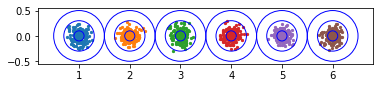

In [164]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

for t in [1, 2, 3, 4, 5, 6]:
    for i in [0.5, 0.3, 0.1]:
        c = patches.Circle(xy=(t, 0), radius=i, fc='None', ec='b', alpha=1, zorder=2)
        ax.add_patch(c)
        
for i in [1, 2, 3, 4, 5, 6]:
    target_posi = all_target_posi[i]
    ax.scatter(target_posi[:,0]+i, target_posi[:, 1], zorder=1, s=5, alpha=1)
        
plt.axis('scaled')
ax.set_aspect('equal')

【問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。

《ヒント》

ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。

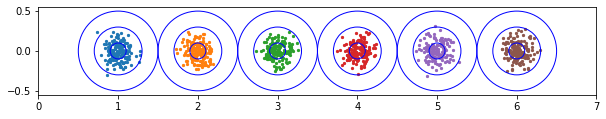

In [199]:
"""
関数化。上記で作成したコードを全てまとめる。
"""

import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt


def dice(n_target):
    """指定された的の数からランダムで番号を出力
    
    パラメーター
    ーーーーーーーーーー
    n_target : int
        まとの数を指定
    
    戻り値
    ーーーーーーーーーー
    target : int
        ランダムに抽出された的の番号
        
    """
    target = np.random.choice(np.arange(1, n_target+1))
    return target


def random_choice(mean=[0, 0], cov = [[0.01, 0],[0, 0.01]]):
    """座標をランダムに選択(標準偏差は0.1と設定(デフォルト))
    
    パラメーター
    ーーーーーーーーーー
    mean : 配列
        平均値（デフォルトは０）
    
    cov : 配列
        共分散（デフォルトは０.０１）
        
    戻り値
    ーーーーーーーーーー
    random_norm : 配列
        正規分布から(平均０、標準偏差０.１で)ランダムに抽出された座標を返す
        
    """
    random_norm = np.random.multivariate_normal(mean, cov, size = 1)
    return random_norm


#的と座標をディクショナリにまとめる
def darts(n_iter, n_target):
    """的と座標をランダムに発生させディクショナリにまとめる
    
    パラメーター
    ーーーーーーーーーー
    n_iter : int
        繰り返し回数
    
    
    戻り値
    ーーーーーーーーーー
    darts_dict : dict
        ランダムに抽出された的と座標を紐つけたディクショナリ
    """
    darts_dict = {}
    for i in range(n_iter):
        target = dice(n_target)
        target_posi = random_choice()
        if target in darts_dict.keys():
            darts_dict[target]= np.concatenate([darts_dict[target], target_posi])
        else:
            darts_dict[target] = target_posi
    return darts_dict


#グラフに出力する
def main(n_target, n_iter):
    """ランダムに抽出した的と座標をグラフに出力する
    
    パラメーター
    ーーーーーーーーーー
    n_target : int
        まとの数を指定
    n_iter : int
        繰り返し回数を指定
        
    出力
    ーーーーーーーーーー
    それぞれの的ごとに座標点が記された散分図
    """

    darts_dict = darts(n_iter=1000, n_target=n_target)
    fig = plt.figure(figsize=(10, 40))
    ax = plt.axes()
    for t in range(1, n_target+1):
        for i in [0.5, 0.3, 0.1]:
            c = patches.Circle(xy=(t, 0), radius=i, fc='None', ec='b', alpha=1, zorder=2)
            ax.add_patch(c)
    for i in range(1, n_target+1):
        target_posi = darts_dict[i]
        ax.scatter(target_posi[:,0]+i, target_posi[:, 1], zorder=1, s=5, alpha=1)
    plt.axis('scaled')
    ax.set_aspect('equal')
    plt.xlim(0, n_target+1)
    plt.show()

#main関数を実行 
main(n_target=6, n_iter=1000)